# State-based dynamic functional connectivity

Currently, Comet includes five state-based dFC methods as published in:

> Mohammad Torabi, Georgios D Mitsis, Jean-Baptiste Poline, On the variability of dynamic functional connectivity<br>assessment methods, GigaScience, Volume 13, 2024, giae009, https://doi.org/10.1093/gigascience/giae009.

- Sliding Window Clustering
- Coactivation Patterns
- Continuous Hidden Markov Model
- Discrete Hidden Markov Model
- Windowless (K-SVD) Model

State-based connectivity analysis requires data from multiple subjects, so we start by getting some pre-processed time series data from the ABIDE dataset which we put in a list (a single 3D numpy array would also be fine):

In [1]:
import numpy as np
from nilearn import datasets
from matplotlib import pyplot as plt
from comet import connectivity, utils

subjects = ["50008", "50010", "50012", "50014", "50020"]
data = datasets.fetch_abide_pcp(SUB_ID=subjects, pipeline='cpac', band_pass_filtering=True, derivatives="rois_dosenbach160")
ts = data.rois_dosenbach160 # list of 2D time series data

print("Num subjects:",len(ts))
print("TS shape:", ts[0].shape)

/home/mibur/miniconda3/envs/dfc-multiverse/lib/python3.11/site-packages/tqdm_joblib/__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


[fetch_abide_pcp] Dataset found in /home/mibur/nilearn_data/ABIDE_pcp

Num subjects: 5
TS shape: (196, 161)


We can then calculate state-based functional connectivity with any of the methods, e.g. KSVD:

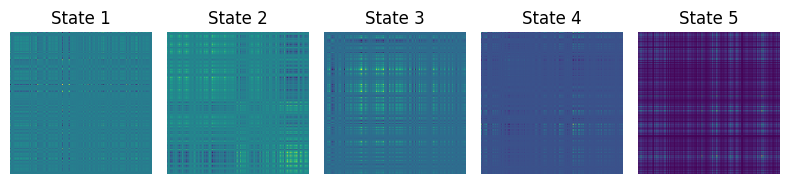

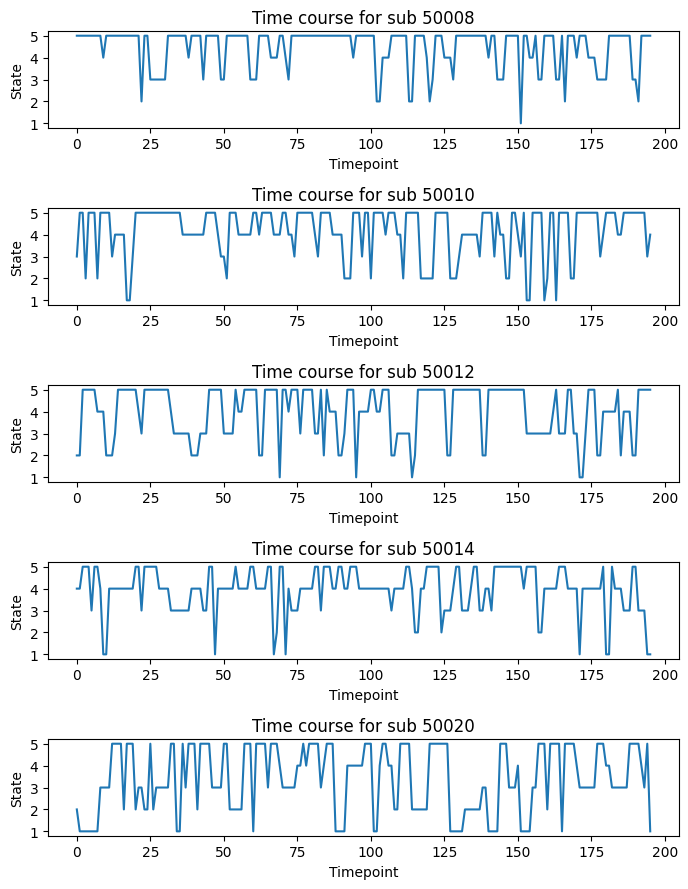

In [3]:
ksvd = connectivity.KSVD(ts, n_states=5)
state_tc, states = ksvd.estimate()

# Plot states and state time courses
fig1, ax1 = utils.state_plots(states=states, figsize=(8,2))
fig2, ax2 = utils.state_plots(state_tc=state_tc, figsize=(7,9), sub_ids=subjects)

Or Coactivation Patterns:

In [4]:
cap = connectivity.CoactivationPatterns(ts, n_states=5)
state_tc, states = cap.estimate()

CAP: 100%|██████████| 5/5 [01:00<00:00, 12.16s/it]


Further summary statistics can also be calculated and plotted as follows:

Dwell times (mean ± sd):
 [0.183 0.198 0.404 0.163 0.052] ± [0.021 0.05  0.084 0.073 0.047]
Mean transition matrix:
 [[0.658 0.011 0.219 0.069 0.044]
 [0.022 0.752 0.221 0.005 0.   ]
 [0.106 0.114 0.717 0.063 0.   ]
 [0.062 0.008 0.189 0.701 0.04 ]
 [0.083 0.    0.    0.063 0.454]]


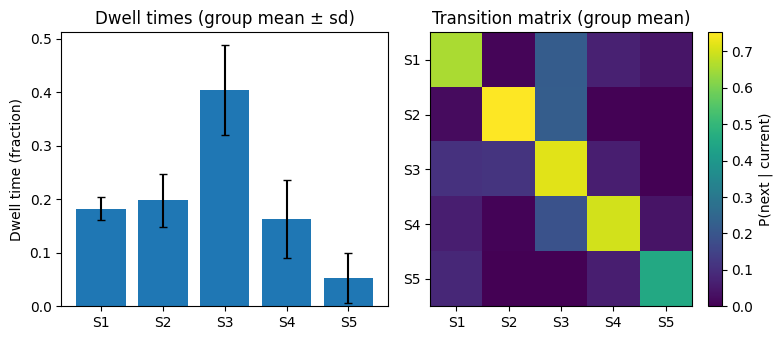

In [ ]:
summary = utils.summarise_state_tc(state_tc)

# You can print the summary statistics
dwell_mean = summary["dwell_mean"]
dwell_std = summary["dwell_std"]
trans_mean = summary["trans_mean"]

print("Dwell times (mean ± sd):\n", np.round(dwell_mean, 3), "±", np.round(dwell_std, 3))
print("Mean transition matrix:\n",  np.round(trans_mean, 3))

# Or you can plot them
summary = utils.summarise_state_tc(state_tc)
fig3, ax3 = utils.state_plots(summary=summary, figsize=(8,3.5))